***
# NLP With Hotel Review Part 2
---
## Author: Tolulope Acquah
---

***
# Table of Contents


[Introduction](#Introduction)<br>

[Importing Libraries and Datasets](#Importing-Libraries-and-the-Datasets:)<br>

[Question 1 - Linear Classifier](#Question-1:-Employ-a-Linear-Classifier-on-this-Dataset) <br> 
- [Question A - Logistic Regression Model](#Question-1---Part-A:) <br>
- [Question B - 20 Words Most Predictive](#Question-1---Part-B:) <br>
- [Question C - Reduced Dimensionality](#Question-1---Part-C:) <br>
- [Question D - Advantage and Disadvantage of Dimensionality Reduction](#Question-1---Part-D:) <br>


[Question 2 - K-Nearest Neighbor Classifier](#Question-2:-Employ-a-K-Nearest-Neighbour-Classifier-on-this-Dataset:) <br>
- [Question A - KNN Model](#Question-2---Part-A:) <br>
- [Question B - Reduced Number of Observations](#Question-2---Part-B:) <br>
- [Question C - Advantage and Disadvantage of Reducing the Number of Observations](#Question-2---Part-C:) <br>
- [Question D - Optimal Value for K](#Question-2---Part-D:) <br>
- [Question E - Issue with Splitting the Data AFTER Performing Vectorization](#Question-2---Part-E:) <br>


[Question 3 - Decision Tree Classifier](#Question-3:-Employ-a-Decision-Tree-Classifier-in-this-Dataset:) <br> 
- [Question A - Decision Tree Model](#Question-3---Part-A:) <br>
- [Question B - Optimal Value for the Maximum Depth](#Question-3---Part-B:) <br>
- [Question C - Advantages of Decision Trees over KNN and Weaknesses of Decision Trees](#Question-3---Part-C:) <br>


[Question 4 - Purpose of the Validation Test](#Question-4:-What-is-the-purpose-of-the-validation-set,-i.e.,-how-is-it-different-than-the-test-set?)<br>


[Question 5 - Re-run Logistic Regression](#Question-5:-Re-run-a-decision-tree-or-logistic-regression-on-the-data-again:) <br> 
- [Question A - 5-Fold Cross Validation](#Question-5---Part-A:) <br>
- [Question B - Confusion Matrix](#Question-5---Part-B:) <br>



[Question 6 - Creation of One New Feature](#Question-6:-Create-one-new-feature-of-your-choice:) <br> 
- [Question A - Explain New Feature](#Question-6---Part-A:) <br>
- [Question B - Run Model From Question 5](#Question-6---Part-B:) <br>


***

---

# Introduction


In this deliverable, I developed several machine learning models to correctly label the sentiment behind hotel reviews.

---

---

# Importing Libraries and the Datasets:

---

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets

train_df = pd.read_csv('data/clean_train_dataframe.csv')
test_df = pd.read_csv('data/clean_test_dataframe.csv')

In [3]:
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_df.shape, test_df.shape)

(12798, 2744) (4267, 2744)


The **clean_train_dataframe csv file** has **12,798 rows** and **2,744 columns**.
The **clean_test_dataframe csv** file has **4,267 rows** and **2,744 columns**.

# Question 1: Employ a Linear Classifier on this Dataset

---

## Question 1 - Part A:

Fit a logistic regression model to this data with the solver set to `lbfgs`. What is the accuracy score on the test set?

To fit a logistic regression model, I followed the following process:

**1. Assign the independent and dependent variable:** since the `rating` column is the target variable, I assigned that column to be "y" (dependent variable), and the rest of the columns to be "X" (independent variables). There are 2 datasets, train and test, so the variables were named accordingly: X_train, y_train, X_test, and y_test.

In [6]:
# Assign the independent and dependent variable
X_train = train_df.drop('rating', axis=1)
y_train = train_df['rating']
X_test = test_df.drop('rating', axis=1)
y_test = test_df['rating']

**2. Scale the data:** By visually inspecting the dataset, it is clear that the numeric columns are not on the same scale, and knowing that model fitting on scaled data does better than model fitting on unscaled data, I decided to scale the data using StandardScaler by importing it from the "sklearn.preprocessing" package. I used the StandardScaler as opposed to the MinMaxScaler since the use of StandardScaler is what is done in practice.

In [7]:
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the X_train dataset
scaler.fit(X_train)

# Transform the X_train and X_test dataset
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**3. Find the best regularization parameter for the logistic regression:** Next, I created a for loop to find the best C-value for the Logistic Regression model, that would result in the most optimal accuracy score for the model. I then plotted both the train and test accuracy scores to see what the best C-value would be for the model.

In [8]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Created empty lists to store the accuracy scores for the different regularization parameters
train_accuracy = []
test_accuracy = []

# Created 11 C-values from 10^-5 to 10^5
C_vals = np.logspace(start=-5, stop=5, num=11, base=10)

for C_val in C_vals:
    
    # Instantiate the model with solver set to lbfgs
    log_reg_model = LogisticRegression(solver='lbfgs', 
                                       random_state=1,
                                       C = C_val)
    
    # Fit the model
    log_reg_model.fit(X_train, y_train)
    
    # Accuracy Score for the train and test set
    train_accuracy.append(log_reg_model.score(X_train, y_train))
    test_accuracy.append(log_reg_model.score(X_test, y_test))

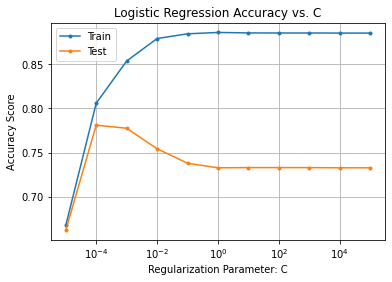

In [9]:
# Plot both train and test accuracies against the C values
plt.figure()
plt.plot(C_vals, train_accuracy, label='Train', marker='.')
plt.plot(C_vals, test_accuracy, label='Test', marker='.')
plt.xscale('log')
plt.title('Logistic Regression Accuracy vs. C')
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Accuracy Score')
plt.grid()
plt.legend()
plt.show()


Based on the plot, it can be seen that over-fitting starts to happen on the train set after C=0.01, and the accuracy score declines for the test set after C=0.0001. It looks like the best model has a C-value of 0.0001, as that provides the highest accuracy score on the test set, while also avoiding over-fitting on the train set as there is a minimal accuracy score difference between both sets.



I ran the Logistic Regression model again with a C-parameter value of 0.0001.

**4. Fit the Logistic Regression Model with the Optimal Regularization Parameter:** Next, I fit the logistic regression model with a C-value of 0.0001.

In [10]:
# 1. Instantiate the model with solver set to lbfgs
log_reg_model = LogisticRegression(solver='lbfgs', 
                                   random_state=1, 
                                   C = 0.0001)

# 2. Fit the model
log_reg_model.fit(X_train, y_train)

# 3. Get the accuracy score on the train and test set
print(f"The accuracy score on the TRAIN set is: {log_reg_model.score(X_train,y_train)}")

print(f"The accuracy score on the TEST set is: {log_reg_model.score(X_test,y_test)}")

The accuracy score on the TRAIN set is: 0.8059853102047195
The accuracy score on the TEST set is: 0.7811108507147879


The accuracy score on the TRAIN set is 80.60% for the logistic regression model. \
**The accuracy score on the TEST set is 78.11% for the logistic regression model.**

## Question 1 - Part B:

What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

To find the 20 words most predictive of a good and bad review, I created dataframes for the negative and positive words using the regression coefficients. I did this by using the `str.startswith` function to filter columns that start with "n" for negative and "p" for positive.

Reference for `str.startswith`:
- https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html

**1. Created a dataframe with the regression coefficients and feature names:** Since the regression coefficients align with the column names, I created a column named "coefficients" that contained all the regression coefficients, and another column of the indexes which are the column names associated with the regression coefficients.

In [11]:
# Made a copy of the initial X_train (unscaled) to get the column names for the coefficients
copy_df = train_df.drop('rating', axis=1)

# Created a dataframe with the coefficients and feature names
columns_coefficient = pd.DataFrame({"coefficients": log_reg_model.coef_[0]},
                                   index=copy_df.columns)

**2. Created 2 Dataframes Containing Negative and Positive Reviews and Sorted it By Descending Order:** With the created dataframe containing all the regression coefficients and feature names, I created 2 separate dataframes containing only feature names that start with "n" for negative reviews and "p" for positive reviews. \
I then filtered the dataframes to show the columns in descending order for positive (to show the highest positive regression coefficients), and ascending order (to show the highest negative regression coefficients). So the feature name with the highest regression coefficients would show first.

In [12]:
# Separated dataframe based on the negative and positive review columns
negative_word_counts_df = columns_coefficient[columns_coefficient.index.str.startswith('n')]
positive_word_counts_df = columns_coefficient[columns_coefficient.index.str.startswith('p')]

# Filtered the dataframe to be shown in ascending and descending order
negative_word_counts = negative_word_counts_df.sort_values("coefficients", ascending=True)
positive_word_counts = positive_word_counts_df.sort_values("coefficients", ascending=False)

**3. Plotted the 20 Words Most Predictive of a Good and Bad Review:** Using the created dataframes showing the negative and positive reviews, I created two bar plots, one for good review and the other for bad reviews. 

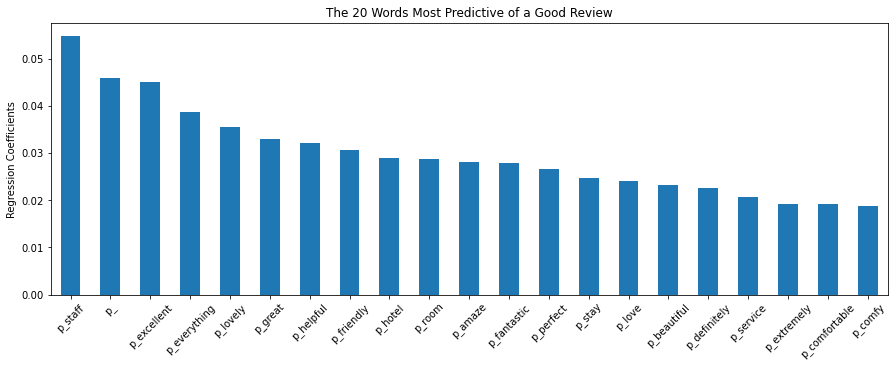

In [13]:
# For positive review columns
positive_word_counts.head(21).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 Words Most Predictive of a Good Review")
plt.ylabel("Regression Coefficients")
plt.xticks(rotation=45)
plt.show()

**The 20 words most predictive of a good review (from the positive review column) are:** staff, excellent, everything, lovely, great, helpful, friendly, hotel, room, amaze, fantastic, perfect, stay, love, beautiful, definitely, service, extremely, comfortable, and comfy.

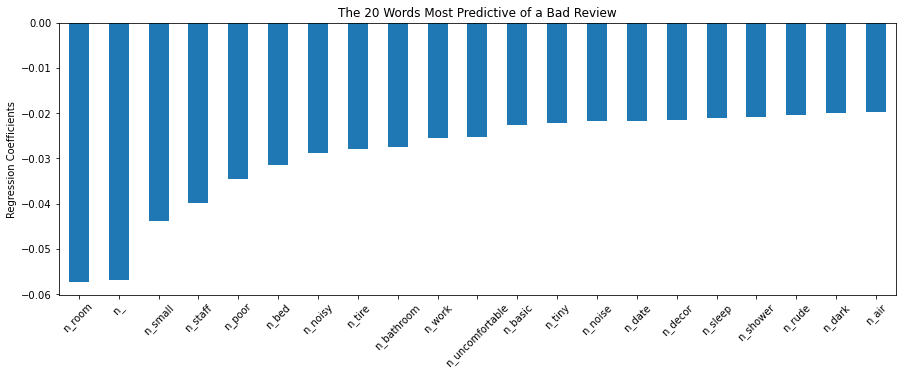

In [14]:
# For negative review columns
negative_word_counts.head(21).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 Words Most Predictive of a Bad Review")
plt.ylabel("Regression Coefficients")
plt.xticks(rotation=45)
plt.show()

**The 20 words most predictive with a bad review (from the negative review column):** room, small, staff, poor, bed, noisy, tire, bathroom, work, uncomfortable, basic, tiny, noise, date, decor, sleep, shower, rude, dark, and air.

## Question 1 - Part C:

Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

**1. Import PCA from the sklearn.decomposition submodule, Fit and Transform the Data:** I imported PCA and instantiated it with `n_components` of 0.9 (90%) because I wanted enough features to explain at least 90% of the variance.

In [15]:
# Instantiate and fit the PCA model to the data
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=0.9)
model_PCA.fit(X_train)

# Transform the data
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

In [16]:
print(f"The original shape used for the logistic regression model was: {X_train.shape}")
print(f"The PCA Transformed shape is: {X_train_PCA.shape}")

The original shape used for the logistic regression model was: (12798, 2743)
The PCA Transformed shape is: (12798, 1891)


**2. Fit the Logistic Regression Model Again with PCA Transformed Data:** Using the PCA transformed X_train and X_test, I then fit the logistic regression model again to see if it would improve the accuracy score.

In [17]:
# Instantiate the model with solver set to lbfgs
log_reg_model_PCA = LogisticRegression(solver='lbfgs', 
                                       random_state=1, 
                                       C = 0.0001)


# Fit the model
log_reg_model_PCA.fit(X_train_PCA, y_train)

# Get the accuracy score on the PCA train and test sets
print(f"TRAIN Score with PCA: {log_reg_model_PCA.score(X_train_PCA,y_train)}")
print(f"TEST Score with PCA: {log_reg_model_PCA.score(X_test_PCA,y_test)}")

TRAIN Score with PCA: 0.7999687451164245
TEST Score with PCA: 0.7818139207874385


**The test score after the PCA transformation for the logistic regression model is 78.18% which is a slight improvement from the regression model prior to the PCA transformation, with 852 fewer features.**

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 


**3. Differentiated between the run time for the logistic regression model without PCA and with PCA:** Using `timeit` I differentiated between the run time for logistic regression model with and without PCA.

In [18]:
# Run-time for Logistic Regression model
%timeit log_reg_model.fit(X_train, y_train)

428 ms ± 90.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# Run-time for PCA Transformed Logistic Regression model
%timeit log_reg_model_PCA.fit(X_train_PCA, y_train)

161 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**The relationship between the number of dimensions and run-time for a logistic regression:**

`n_components` was given a threshold of 90%, signifying that the number of principal components should be able to explain 90% of the original dataset's variance. This resulted in 852 columns being dropped from the original dataset. The original dataset had a shape of 12,798 rows and 2,743 columns. The new PCA transformed shape has 12,798 rows and 1,891 columns. This means that 1,891 features were needed to explain 90% of the original dataset's variance.

The run-time for the original logistic regression model without the PCA transformation was approximately 428 milliseconds. The run-time with the PCA transformation was 161 milliseconds, meaning that the run-time for the logistic regression model without the PCA transformation was slower than the time it took the PCA transformation logistic regression model to run. With less features (reduced dimensions), the run-time is faster than if the original features were used.

## Question 1 - Part D:

List one advantage and one disadvantage of dimensionality reduction

**Advantage of Dimensionality Reduction:**

Too many features could lead to over-fitting as was observed in the logistic regression model without the PCA transformation. One advantage of dimensionality reduction is that it reduces the risk of over-fitting by using less features, without losing all the data from the dropped features.

**Disadvantage of Dimensionality Reduction:**

It is more tedious to interpret the results of the model when conducting PCA transformation. With logistic regression, the coefficients directly impact the prediction of the odds of an outcome of a categorical variable, but when dimensionality reduction occurs, it is more work to interpret the loadings to see how features impact the prediction of the odds of an outcome.

---

# Question 2: Employ a K-Nearest Neighbour Classifier on this Dataset:

---

## Question 2 - Part A:

Fit a KNN model to this data. What is the accuracy score on the test set?

**1. Import, Instantiate and Fit the Model and Score the Train and Test Sets:** To fit a KNN model to the data, I imported `KNeighborsClassifier` and instantiated the model without providing a specific size of the nearest neighbor, `n_neighbors`. By not providing a specific value for `n_neighbors`, a default value of 5 is used. I then fit the KNN model to the X_train and y_train set, and scored the X_test and y_test to see what the accuracy score is.

In [20]:
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the Model and Fit it to the data using the default n_neighbors of 5
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

# Score the Model on the Test Set
print(f"The number of neighbors is: {KNN_model.n_neighbors}")
print(f"The training accuracy score is: {KNN_model.score(X_train, y_train)}")
print(f"The test accuracy score is: {KNN_model.score(X_test, y_test)}")

The number of neighbors is: 5
The training accuracy score is: 0.751211126738553
The test accuracy score is: 0.6367471291305367


**The accuracy score on the test set is 63.67%**, and the accuracy score on the train set is 75.12%, indicating severe over-fitting as there is a big gap between the train and test accuracy.

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||

## Question 2 - Part B:

KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

I reduced the number of observations to a value of 3. The reasoning behind this was because I couldn't reduce it to 4, since it is an even number. An odd number of observations would be able to break any ties.

In [21]:
# Instantiate the Model and Fit it to the data using the default n_neighbors of 3
KNN_model_reduced = KNeighborsClassifier(n_neighbors=3)
KNN_model_reduced.fit(X_train, y_train)

# Score the Model on the Test Set
print(f"The number of neighbors is: {KNN_model_reduced.n_neighbors}")
print(f"The training accuracy score is: {KNN_model_reduced.score(X_train, y_train)}")
print(f"The test accuracy score is: {KNN_model_reduced.score(X_test, y_test)}")

The number of neighbors is: 3
The training accuracy score is: 0.7961400218784185
The test accuracy score is: 0.6320599953128662


**The accuracy score of the test accuracy with a number of observations set to 3, is 63.21%**, while the training accuracy score is 79.61%, which still signifies severe over-fitting, and provides a lower accuracy score than when the number of neighbors was 5.

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||

In [22]:
# Run-time for n_neighbors = 5
%timeit KNN_model.fit(X_train, y_train)

8.05 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
# Run-time for n_neighbors = 3
%timeit KNN_model_reduced.fit(X_train, y_train)

7.69 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**The relationship between the number of observations and run-time for KNN:**

When the number of observations was 5, the run-time was 8.05 milliseconds. When the number of observations was 3, the run-time was 7.69 milliseconds. This means that when the number of observations is low, the run-time is shorter meaning that the code runs faster than when the number of observations is higher.

As the number of observations increase, so does the run-time.

## Question 2 - Part C:

List one advantage and one disadvantage of reducing the number of observations.

**Advantage of Reducing the Number of Observations:**

An advantage of reducing the number of observations is that it reduces the intensity of computing predictions. It only looks at the specified number of closest data points to the point that is being predicted, so with a reduced number of observations, it won't take too long to predict the data point.

**Disadvantage of Reducing the Number of Observations:**

A disadvantage of reducing the number of observations is that it only uses 'n' number of observations to predict, which would result in a lower accuracy score on the model since the number of observations might not consider the other important features.

## Question 2 - Part D:

Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

**1. Import `train_test_split` and Split Data:** Before finding an optimal value for K in the KNN algorithm, I split the `train_df` into a train set and validation set. I used a percentage of 30% of the data to be the validation set, and 70% of the data to be the train set.

In [24]:
# Import train_test_split 
from sklearn.model_selection import train_test_split


# Split the dataset into train and validation sets
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train,
                                                                       y_train,
                                                                       test_size = 0.3,
                                                                       random_state=1)
print(f"The shape of original train set: {X_train.shape}")
print(f"The shape of the new train set: {X_train_new.shape}")
print(f"The shape of the validation set: {X_validation.shape}")

The shape of original train set: (12798, 2743)
The shape of the new train set: (8958, 2743)
The shape of the validation set: (3840, 2743)


**2. Create a For Loop to find the Optimal value for K:** I created a for loop with values from 1 to 51, with a step of 2 (to only have odd values) to use as number of observations to see which K value has the best accuracy score, and plot the train and validation scores to compare, and retrieve the optimal value for K in the KNN algorithm.

In [25]:
# For loop to determine the best number of data points to use
neighbors = range(1,51,2)

# Make empty lists for the train and test accuracy score to compare
train_scores = []
validation_scores = [ ]

for neighbor in neighbors:
    
    # Instantiate and Fit
    KNN_model = KNeighborsClassifier(n_neighbors = neighbor)
    KNN_model.fit(X_train_new, y_train_new)
    
    # Append the scores to the empty list
    train_scores.append(KNN_model.score(X_train_new, y_train_new))
    validation_scores.append(KNN_model.score(X_validation, y_validation))

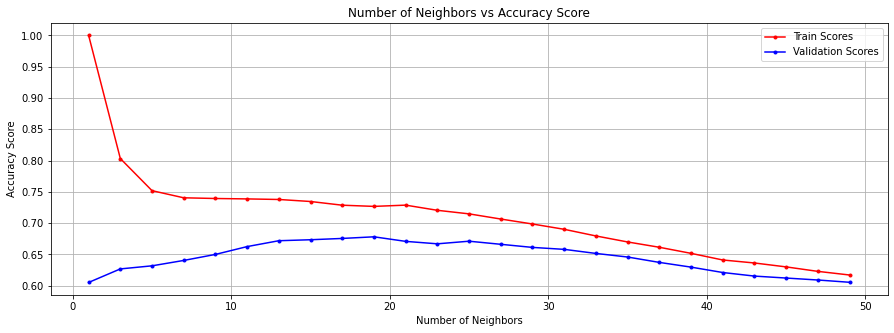

In [26]:
# Plot the train and validation accuracy scores
plt.figure(figsize=(15,5))
plt.plot(neighbors, train_scores, color="red", label="Train Scores", marker='.')
plt.plot(neighbors, validation_scores, color="blue", label="Validation Scores", marker='.')
plt.legend()
plt.grid()
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neighbors")
plt.title("Number of Neighbors vs Accuracy Score")
plt.show()

By visually inspecting the plot, it seems that the optimal value for K is 19, because it has the highest validation score, and the difference in train and validation score at that optimal value is not significant.

To make sure that n_neighbors at 19 is really the highest validation accuracy score, I used `np.argmax` to find the index with the highest score, and used that to find out what the value of K is.

In [27]:
# Index of the highest validation accuracy

highest_k_index = np.argmax(validation_scores)
highest_k_index

9

In [28]:
optimal_k = neighbors[highest_k_index]
optimal_k

19

**The optimal value for K is where `n_neighbors` is 19.**

**3. Run the KNN Model again with the Optimal Value for K:**

In [29]:
# Run the KNN Model with the Optimal Value for K
KNN_final_model = KNeighborsClassifier(n_neighbors = 19)
KNN_model.fit(X_train, y_train)

# Score on the test set
KNN_model.score(X_test, y_test)

0.6594797281462386

**The test accuracy score using the optimal value for K where `n_neighbors` is 19, is 65.95% which is slightly better than the original KNN model using the default number of observations of 5 which had an accuracy score of 63.21%.**

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||
|**KNN with optimal value for K=19**||65.95%||

## Question 2 - Part E:

**What is the issue with splitting the data into train and validation sets after performing vectorization?**

During vectorization, the data has already been fit resulting in some data leakage. The model has already seen the train and validation sets during vectorization, and ideally the model should not be able to see the validation data prior to scoring to prevent data leakage. 

To make sure the model does not see the validation/test sets, it would be best to split the data first, prior to vectorization.

---

# Question 3: Employ a Decision Tree Classifier in this Dataset:

---

## Question 3 - Part A:

Fit a decision tree model to this data. What is the accuracy score on the test set?

**1. Import, Instantiate, Fit, and Retrieve Accuracy Score:** To fit a decision tree model to the data, I imported the `DecisionTreeClassifier`, instantiated the model with an unbounded depth to see how the accuracy score would be. I then fit the model to the X_train and y_train, and scored the test set.

In [30]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate and Fit the Model with unbounded max_depth
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

# Accuracy Score
print(f"The train set accuracy score is: {DT_model.score(X_train, y_train)}")
print(f"The test set accuracy score is: {DT_model.score(X_test, y_test)}")

The train set accuracy score is: 1.0
The test set accuracy score is: 0.6976798687602531


**The accuracy score on the test set is 69.77%.** The accuracy score on the train set is 100%. The difference between the accuracy scores indicate that there is over-fitting happening.

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||
|**KNN with optimal value for K=19**||65.95%||
|**Decision Tree with unbounded depth**||69.77%||

## Question 3 - Part B:

Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

To find an optimal value for the maximum depth of the decision tree, I created a for loop with a range of 1 to 20 for the max_depth. Each value from 1 to 20 was fit to the decision tree classifier model and the accuracy score for each depth was put in a list to compare what depth provided the best accuracy score for both the test and validation sets.

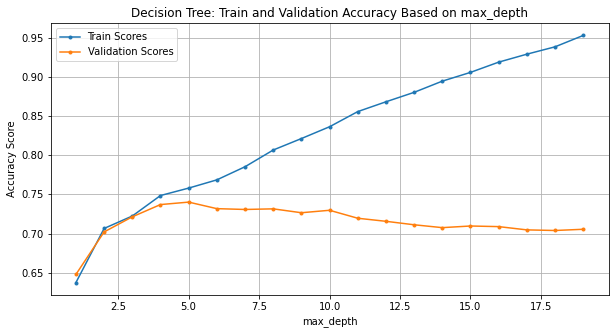

In [31]:
# Created empty lists for the validation and train accuracy scores
validation_scores = []
train_scores = []

# Range from 1 to 20 for the max_depth
max_depth_values = range(1,20)

# for loop for the decision tree classifier
for depth in max_depth_values:
    
    DT_model = DecisionTreeClassifier(max_depth=depth,random_state=1)
    
    # Used the already created train and validation sets to fit and score the model 
    DT_model.fit(X_train_new, y_train_new)
    
    validation_scores.append(DT_model.score(X_validation, y_validation))
    train_scores.append(DT_model.score(X_train_new, y_train_new))

# Plot the train and validation scores
plt.figure(figsize=(10,5))
plt.plot(max_depth_values, train_scores, label='Train Scores', marker='.')
plt.plot(max_depth_values, validation_scores, label='Validation Scores', marker='.')
plt.legend()
plt.title('Decision Tree: Train and Validation Accuracy Based on max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

By visually inspecting the plot, the `max_depth` of 5 has the highest validation score without over-fitting. After a max_depth of 5, the validation accuracy score starts to decrease.

Next, I fitted the model with the optimal `max_depth`:

In [32]:
final_DT_model = DecisionTreeClassifier(max_depth=5,random_state=1)
final_DT_model.fit(X_train,y_train)

final_DT_model.score(X_test, y_test)

0.739629716428404

**The accuracy test score for the optimal value for the maximum depth is 73.96% which is better than the original Decision Tree model that had an accuracy score of 69.77%.**

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||
|**KNN with optimal value for K=19**||65.95%||
|**Decision Tree with unbounded depth**||69.77%||
|**Decision Tree with optimal value for depth (5)**||73.96%||

## Question 3 - Part C:

Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

**Advantages of Decision Trees over KNN:**
1. KNN is computationally intensive since it tries to remember each point in the dataset, it is slow with large datasets when it comes to making predictions. In this regard, Decision Trees are faster.


2. Decision Trees don't need the data scaled or normalized but KNN needs the data to be normalized/scaled since it tries to remember each point in the dataset prior to prediction, but that is not the case with Decision Trees because they look at the features one at a time, not all together like KNN.


**Weaknesses of Decision Trees:**
1. Decision Tree is very sensitive to the dataset. A minor change in the data can result in significantly different outcome in prediction.


2. It is prone to over-fitting, as the size of the decision tree increases, the higher the chance of over-fitting.

---

# Question 4: What is the purpose of the validation set, i.e., how is it different than the test set?

---

The purpose of the validation set is to optimize hyper-parameters, to try different parameters (i.e, different number of observations, regularization penalties, etc.) that can be used to optimize the model, without exposing the test set (which should be unseen by the model). 

It's different from the test set because the hyper-parameters are fine tuned using the validation set. The test set is used as a final test of the model, after the test set has been exposed to the model, changes to the model or fine tuning of the parameters used in the model can't be changed. The validation set is the dataset used to provide the most optimal model possible by tuning the model's hyper-parameters, prior to the final testing using the test set.

---

# Question 5: Re-run a decision tree or logistic regression on the data again:

---

## Question 5 - Part A:

Perform a 5-fold cross validation to optimize the hyperparameters of your model.

To perform a 5-fold cross validation, I imported the `cross_val_score` from the `sklearn.model_selection` package. Since a logistic regression model will be run, I also did a for loop to find the best C-value to use for the model based on the highest cross validation score.

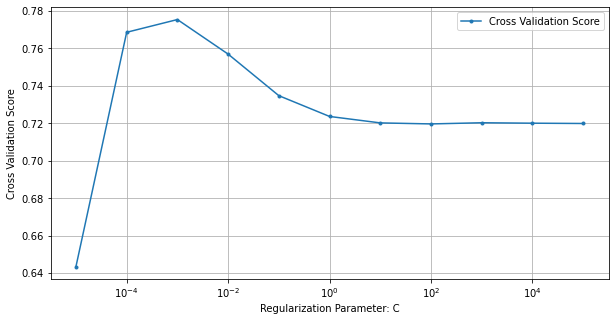

The best model has C = 0.001


In [33]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Create range for C-value
C_range = np.logspace(start=-5, stop=5, num=11, base=10)

# List to put in the cross validation scores
cross_validation_scores = []

# For loop to find the optimal C-value
for c in C_range:
    
    # Instantiate the model
    fold_logreg = LogisticRegression(C=c,random_state=1)
    
    # calculation to get the cross validation score which is the mean of scores from all the folds
    scores = np.mean(cross_val_score(fold_logreg, X_train, y_train, cv=5))
    
    # append the scores to the list above
    cross_validation_scores.append(scores)

# Plot the cross validation scores and the C-values
plt.figure(figsize=(10,5))
plt.plot(C_range, cross_validation_scores, label="Cross Validation Score", marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel("Regularization Parameter: C")
plt.ylabel("Cross Validation Score")
plt.grid()
plt.show()


# Print out the C-value with the highest cross validation score
max_score = np.array(cross_validation_scores).argmax()

print(f"The best model has C = {C_range[max_score]}")

C=0.001 has the highest cross validation score. I ran the Logistic Regression model again with this C-value, and scored it on the test set.

In [34]:
final_logreg = LogisticRegression(C=0.001)
final_logreg.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [35]:
final_logreg.score(X_test, y_test)

0.777595500351535

**The accuracy score on the test set is 77.76%**

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||
|**KNN with optimal value for K=19**||65.95%||
|**Decision Tree with unbounded depth**||69.77%||
|**Decision Tree with optimal value for depth (5)**||73.96%||
|**Logistic Regression after using cross validation**||77.76%||

## Question 5 - Part B:

What does your confusion matrix look like for your best model on the test set?

To get the confusion matrix, I used the `confusion_matrix` function in the metrics module of sklearn. Since the best model on the test set is Logistic Regression with PCA, I used that model to get class predictions, I then used the predictions to create the matrix using `confusion_matrix`.

The confusion matrix is named first with Predicted Class 0, then Predicted Class 1, which in this case is Predicted Not Good and then Predicted Good. The indexes are named the same with True Class 0, then True Class 1.

In [36]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Get the class predictions for the ratings
y_pred = log_reg_model_PCA.predict(X_test_PCA)

# Use the class predictions to create the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Put the confusion matrix in a dataframe
# Columns and Index is named starting from Class 0
confusion_df = pd.DataFrame(confusion_matrix,
                           columns=["Predicted Not Good", "Predicted Good"],
                           index=["True Not Good", "True Good"])

# Display the confusion matrix in the dataframe
display(confusion_df)

,Predicted Not Good,Predicted Good
True Not Good,1159,650
True Good,281,2177


The confusion matrix shows that 1,159 reviews in the test set was predicted as not good (rating class of 0) and was actually true not good, hence a "True Negative". 650 reviews were predicted as good reviews (rating class of 1), but were truly not good reviews, resulting in a "False Positive". 281 reviews were predicted as not good, but were actually true good. 2,177 reviews were predicted as having good ratings, and were truly good ratings.

This means that 281 reviews were misclassified as having a bad rating, when it was actually a good rating. While, 650 reviews were misclassified as having a good rating, when it was actually a bad rating. Overall, majority of the reviews were predicted correctly.

---

# Question 6: Create one new feature of your choice:

---

## Question 6 - Part A:

Explain your new feature and why you consider it will improve accuracy.

The new feature that I added was a categorical column indicating if the total positive word counts was greater than the total negative word counts in the review. Logically, if the total number of positive word counts outweigh the total number of negative word counts, it would arguably mean that the experience at the hotel was more pleasant than unpleasant, equating to a good rating. This way, 2 features will be considered in this new feature.

To add this new feature, I first made a copy of the original train dataset:

In [37]:
# Made a copy of the original train dataset
feature_testing_train_df = train_df.copy()
feature_testing_test_df = test_df.copy()

# Check to make sure it worked
feature_testing_train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Check to make sure it worked
feature_testing_test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


I then created the new feature, `positive_over_negative` where if the total positive word counts in the review are greater than the total negative word counts in the review, it should be given a value of 1, indicating a good rating. If the positive word counts is not greater than the negative word counts, then the row should be given a value of 0, indicating a "not good" rating.

In [39]:
# Creation of new column
feature_testing_train_df['positive_over_negative'] = np.where((feature_testing_train_df['Review_Total_Positive_Word_Counts'] > feature_testing_train_df['Review_Total_Negative_Word_Counts']), 1, 0)
feature_testing_test_df['positive_over_negative'] = np.where((feature_testing_test_df['Review_Total_Positive_Word_Counts'] > feature_testing_test_df['Review_Total_Negative_Word_Counts']), 1, 0)

# Check to make sure it worked
feature_testing_train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,positive_over_negative
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,1,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,1,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,1,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Check to make sure it worked
feature_testing_test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,positive_over_negative
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,1
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,1,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,1,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


Now that the new column has been created, I dropped the columns used to create the new feature to eliminate collinearity of the independent variables:

In [41]:
# Drop columns used to create the new feature
feature_testing_train_df.drop(['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts'], axis=1, inplace=True)
feature_testing_test_df.drop(['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts'], axis=1, inplace=True)

In [42]:
# Check to make sure it worked
feature_testing_train_df.head()

,Additional_Number_of_Scoring,Average_Score,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,month_of_review,year_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,positive_over_negative
0,620,9.0,1974,1,562,51.506558,-0.004514,1,1,2016,...,0,0,0,0,0,0,0,0,1,1
1,1258,9.4,4204,5,276,51.502435,-0.000250,0,10,2016,...,0,0,0,0,0,0,0,0,1,0
2,995,8.1,3826,1,129,51.504348,-0.033444,0,3,2017,...,0,0,0,0,0,0,0,0,1,1
3,853,8.4,2726,10,164,51.507377,0.038657,0,2,2017,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,6608,69,639,51.513556,-0.180002,1,11,2015,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Check to make sure it worked
feature_testing_test_df.head()

,Additional_Number_of_Scoring,Average_Score,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,month_of_review,year_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,positive_over_negative
0,1005,8.3,3469,2,297,51.559096,-0.284704,0,10,2016,...,0,0,0,0,0,0,0,0,0,1
1,487,8.8,1805,1,4,51.474469,-0.019428,6,7,2017,...,0,0,0,0,0,0,0,0,1,1
2,570,9.3,2319,1,590,51.505696,-0.101525,1,12,2015,...,0,0,0,0,0,0,0,0,1,1
3,2623,8.7,12158,2,269,51.500961,-0.116591,0,11,2016,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,1567,2,373,51.515125,-0.160066,1,7,2016,...,0,0,0,0,0,0,0,0,0,0


## Question 6 - Part B:


Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

Now that the new feature has been created and the old features used to create the new one has been dropped, I ran the cross validation and logistic regression again to determine if there is an improvement in accuracy.

First, I assigned the independent variables and dependent variable:

In [44]:
# Assign independent variable
X_train_feature = feature_testing_train_df.drop('rating', axis=1)
X_test_feature = feature_testing_test_df.drop('rating', axis=1)

# Assign dependent variable
y_train_feature = feature_testing_train_df['rating']
y_test_feature = feature_testing_test_df['rating']

The dataset is not scaled, so the next step was to scale the train set, and transform the train and test set.

In [45]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the X_train dataset
scaler.fit(X_train_feature)

# Transform the X_train and X_test dataset
X_train_feature = scaler.transform(X_train_feature)
X_test_feature = scaler.transform(X_test_feature)

Next, I ran the model from question 5 again, the logistic regression model and cross validation to find the optimal hyper-parameter for the logistic regression model.

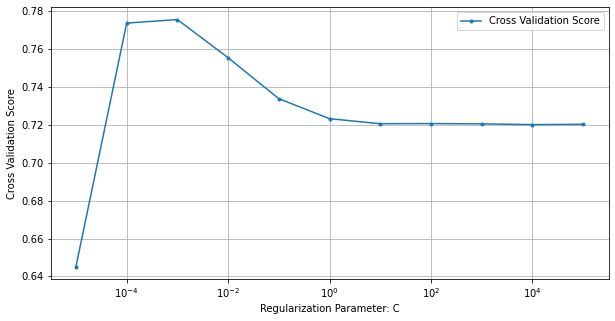

The best model has C = 0.001


In [46]:
# Create range for C-value
C_range = np.logspace(start=-5, stop=5, num=11, base=10)

# List to put in the cross validation scores
cross_validation_scores_feature = []

# For loop to find the optimal C-value
for c in C_range:
    
    # Instantiate the model
    feature_logreg = LogisticRegression(C=c,random_state=1)
    
    # calculation to get the cross validation score which is the mean of scores from all the folds
    scores_feature = np.mean(cross_val_score(feature_logreg, X_train_feature, y_train_feature, cv=5))
    
    # append the scores to the list above
    cross_validation_scores_feature.append(scores_feature)
    

# Plot the cross validation scores and the C-values
plt.figure(figsize=(10,5))
plt.plot(C_range, cross_validation_scores_feature, label="Cross Validation Score", marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel("Regularization Parameter: C")
plt.ylabel("Cross Validation Score")
plt.grid()
plt.show()


# Print out the C-value with the highest cross validation score
max_score_feature = np.array(cross_validation_scores_feature).argmax()

print(f"The best model has C = {C_range[max_score_feature]}")

My best model so far has been logistic regression with PCA, so I ran the same model again but with the new feature to determine if there would be an improvement in the accuracy score.

In [47]:
# Instantiate and fit the PCA model to the data
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=0.9)
model_PCA.fit(X_train_feature)

# Transform the data
X_train_feature_PCA = model_PCA.transform(X_train_feature)
X_test_feature_PCA = model_PCA.transform(X_test_feature)

In [48]:
# Instantiate the model with solver set to lbfgs
feature_log_reg_model_PCA = LogisticRegression(random_state=1,C = 0.001)


# Fit the model
feature_log_reg_model_PCA.fit(X_train_feature_PCA, y_train_feature)

# Get the accuracy score on the PCA train and test sets
print(f"TRAIN Score with PCA: {feature_log_reg_model_PCA.score(X_train_feature_PCA,y_train_feature)}")
print(f"TEST Score with PCA: {feature_log_reg_model_PCA.score(X_test_feature_PCA,y_test_feature)}")

TRAIN Score with PCA: 0.8376308798249726
TEST Score with PCA: 0.7815795640965549


**The accuracy test score for the Logistic Regression model with the addition of this new feature is 78.16%.**

|Model Type || Accuracy Score on the Test Set || 
|-|-|--------------------||
|**Logistic Regression without PCA**||78.11%||
|**Logistic Regression with PCA**|| 78.18% || 
|**KNN with default number of observations (5)**||63.67%||
|**KNN with number of observations of 3**||63.21%||
|**KNN with optimal value for K=19**||65.95%||
|**Decision Tree with unbounded depth**||69.77%||
|**Decision Tree with optimal value for depth (5)**||73.96%||
|**Logistic Regression after using cross validation**||77.76%||
|**Logistic Regression after adding new feature**||78.16%||

The accuracy score of my best model, which is Logistic Regression with PCA having an accuracy test score of 78.18%, did not improve after adding the new feature. The accuracy of the test set of the model with the new feature is 78.16%. This tells me that there is potential to add a better feature to improve the accuracy score and model in general.